##### Make a binary classification dataset with Scikit-Learn's make_moons() function. 
* For consistency, the dataset should have 1000 samples and a random_state=42. Turn the data into PyTorch tensors. 
* Split the data into training and test sets using train_test_split with 80% training and 20% testing.

In [1]:
# Check for GPU
!nvidia-smi

Sun Dec 11 20:34:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.106.00   Driver Version: 460.106.00   CUDA Version: N/A      |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:06:00.0 Off |                    0 |
| N/A   36C    P0    44W / 300W |      0MiB / 32510MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:

# Import torch

import torch
torch.cuda.is_available()


# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
from sklearn.datasets import make_moons #import make moons dataset from sklearn dataset

#make 1000 samples

num_samples = 1000

#create circles
x,y = make_moons(n_samples=num_samples,
                  noise = 0.07,
                  random_state = 42) #equal to setting random seed

x[:10], y[:10]

(array([[-0.03341062,  0.4213911 ],
        [ 0.99882703, -0.4428903 ],
        [ 0.88959204, -0.32784256],
        [ 0.34195829, -0.41768975],
        [-0.83853099,  0.53237483],
        [ 0.59906425, -0.28977331],
        [ 0.29009023, -0.2046885 ],
        [-0.03826868,  0.45942924],
        [ 1.61377123, -0.2939697 ],
        [ 0.693337  ,  0.82781911]]), array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [4]:
import matplotlib.pyplot as plt 
plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.RdBu)

In [5]:
type(x)

numpy.ndarray

In [6]:
#convert numpy array to torch
import torch
X = torch.tensor(x, dtype=torch.float)
y = torch.tensor(y, dtype=torch.float)

type(x), type(y), print(x[:5])

[[-0.03341062  0.4213911 ]
 [ 0.99882703 -0.4428903 ]
 [ 0.88959204 -0.32784256]
 [ 0.34195829 -0.41768975]
 [-0.83853099  0.53237483]]


(numpy.ndarray, torch.Tensor, None)

In [7]:
#now we split the data into train and test

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)


(800, 200, 800, 200)

##### Build a model by subclassing nn.Module that incorporates non-linear activation functions and is capable of fitting the data you created in 1.
* Feel free to use any combination of PyTorch layers (linear and non-linear) you want.

In [8]:
x_train[:1].shape

torch.Size([1, 2])

In [9]:
y_train[:1].shape

torch.Size([1])

#from above x and y shape we understand that, input shape = 2 and output shape =1. So using that in in_features and out_Features to build model

In [10]:
from torch import nn

class MoonModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = in_features, out_features = hidden_units)
        self.layer_2 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
        self.layer_3 = nn.Linear(in_features = hidden_units, out_features = out_features)
        self.relu = nn.ReLU() #relu is a non linear activation function
        
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
bin_model = MoonModel(in_features=2,
                      out_features=1,
                      hidden_units=10).to(device)
print(bin_model)     

MoonModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [11]:
bin_model.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.3925,  0.5194],
                      [-0.1410,  0.4145],
                      [ 0.6039,  0.0555],
                      [-0.3451,  0.5581],
                      [ 0.4170, -0.1751],
                      [ 0.3519,  0.0580],
                      [-0.4938,  0.1580],
                      [ 0.2694, -0.3475],
                      [ 0.2361, -0.4560],
                      [-0.2360,  0.5032]])),
             ('layer_1.bias',
              tensor([ 0.2645, -0.4203, -0.1159,  0.2619, -0.2678, -0.2691, -0.4320,  0.4035,
                       0.5771,  0.6105])),
             ('layer_2.weight',
              tensor([[ 0.1308,  0.3081, -0.0225,  0.1018,  0.2987,  0.2664,  0.1440,  0.0300,
                        0.1598, -0.0202],
                      [ 0.1070,  0.1659,  0.0691, -0.2676,  0.2880,  0.3033,  0.2835, -0.0731,
                       -0.0433,  0.2167],
                      [ 0.0104, -0.1524,  0.1551,  0.0118, -0.1696,  0.1422, -0.2504, 

In [12]:
y_logits = bin_model(x_train.to(device)).squeeze()
y_logits[:5], y_logits.shape

(tensor([-0.4806, -0.4187, -0.4266, -0.4170, -0.3217], grad_fn=<SliceBackward>),
 torch.Size([800]))

 * 1) Our model outputs are going to be logits.
 * 2) We can convert logits into prediction probabilities by passing them to somekind of activation function 
(eg.sigmoid for binary classification and softmax for muticlass classification).
 * 3) convert model predictions into prediction labels by either rounding them or taking the argmax().

In [13]:
#use sigmoid function for output activation to turn preidctions into output probabilities

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5], y_pred_probs.shape

(tensor([0.3821, 0.3968, 0.3949, 0.3972, 0.4203], grad_fn=<SliceBackward>),
 torch.Size([800]))

In [14]:
#to convert to binary labels , we do rounding

y_preds = torch.round(y_pred_probs)
print(y_preds[:5])

tensor([0., 0., 0., 0., 0.], grad_fn=<SliceBackward>)


In [15]:
y_preds.shape

torch.Size([800])

In [16]:
y_test.shape

torch.Size([200])

##### Setup a binary classification compatible loss function and optimizer to use when training the model.

In [17]:
#calculating accuracy
from torchmetrics import Accuracy
acc_fn = Accuracy().to(device) # send accuracy function to device 
acc_fn

Accuracy()

In [18]:
#after creating model, set up loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(bin_model.parameters(), lr = 0.1)



##### Create a training and testing loop to fit the model you created in 2 to the data you created in 1.
* To measure model accuray, you can create your own accuracy function or use the accuracy function in TorchMetrics.
* Train the model for long enough for it to reach over 96% accuracy.
* The training loop should output progress every 10 epochs of the model's training and test set loss and accuracy.

In [19]:
torch.manual_seed(42)

#set number of epochs:
epochs = 1000

epoch_count =[]
loss_values =[]
test_loss_values =[]

# Send data to the device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

#training loop

for epoch in range(epochs):
    
    1.#training model
    bin_model.train()
    
    2. #forward pass
    
    y_logits = bin_model(x_train).squeeze()
    y_pred_probs = torch.sigmoid(y_logits)
    y_pred = torch.round(y_pred_probs)
    
    
    3. #calculate loss/accuracy
    
    loss = loss_fn(y_logits, y_train)
    #we are using logits are input because the bcewithlogitloss()
                         #that we are using requires raw logits as input
    acc = acc_fn(y_pred, y_train.int()) # the accuracy function needs to compare pred labels (not logits) with actual labels
    
    4. #Optimizer zero grad
    
    optimizer.zero_grad()
    
    5. #loss backward(backward propogation to reduce loss)
    
    loss.backward()
    
    6. #optimizer step(gradient descent)
    
    optimizer.step()
    
    7.#set testing model
    
    bin_model.eval()
    
    with torch.no_grad(): #turns off the gradient tracking
        
        #1.do forward pass
        
        test_logits = bin_model(x_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        
        
        #2. calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        
        test_acc = acc_fn(test_pred, y_test.int())
        
    if epoch%100 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch} | Loss:{loss:.2f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.2f}, Test acc: {test_acc:.2f}%")
        
        #print out model state dict()
        #print(model_2.state_dict())

Epoch:0 | Loss:0.71 , Acc: 0.50% | Test Loss: 0.71, Test acc: 0.50%
Epoch:100 | Loss:0.31 , Acc: 0.86% | Test Loss: 0.32, Test acc: 0.85%
Epoch:200 | Loss:0.24 , Acc: 0.89% | Test Loss: 0.24, Test acc: 0.89%
Epoch:300 | Loss:0.23 , Acc: 0.89% | Test Loss: 0.23, Test acc: 0.89%
Epoch:400 | Loss:0.23 , Acc: 0.89% | Test Loss: 0.22, Test acc: 0.89%
Epoch:500 | Loss:0.22 , Acc: 0.90% | Test Loss: 0.21, Test acc: 0.89%
Epoch:600 | Loss:0.20 , Acc: 0.91% | Test Loss: 0.20, Test acc: 0.89%
Epoch:700 | Loss:0.19 , Acc: 0.92% | Test Loss: 0.18, Test acc: 0.90%
Epoch:800 | Loss:0.16 , Acc: 0.93% | Test Loss: 0.15, Test acc: 0.93%
Epoch:900 | Loss:0.11 , Acc: 0.95% | Test Loss: 0.11, Test acc: 0.98%


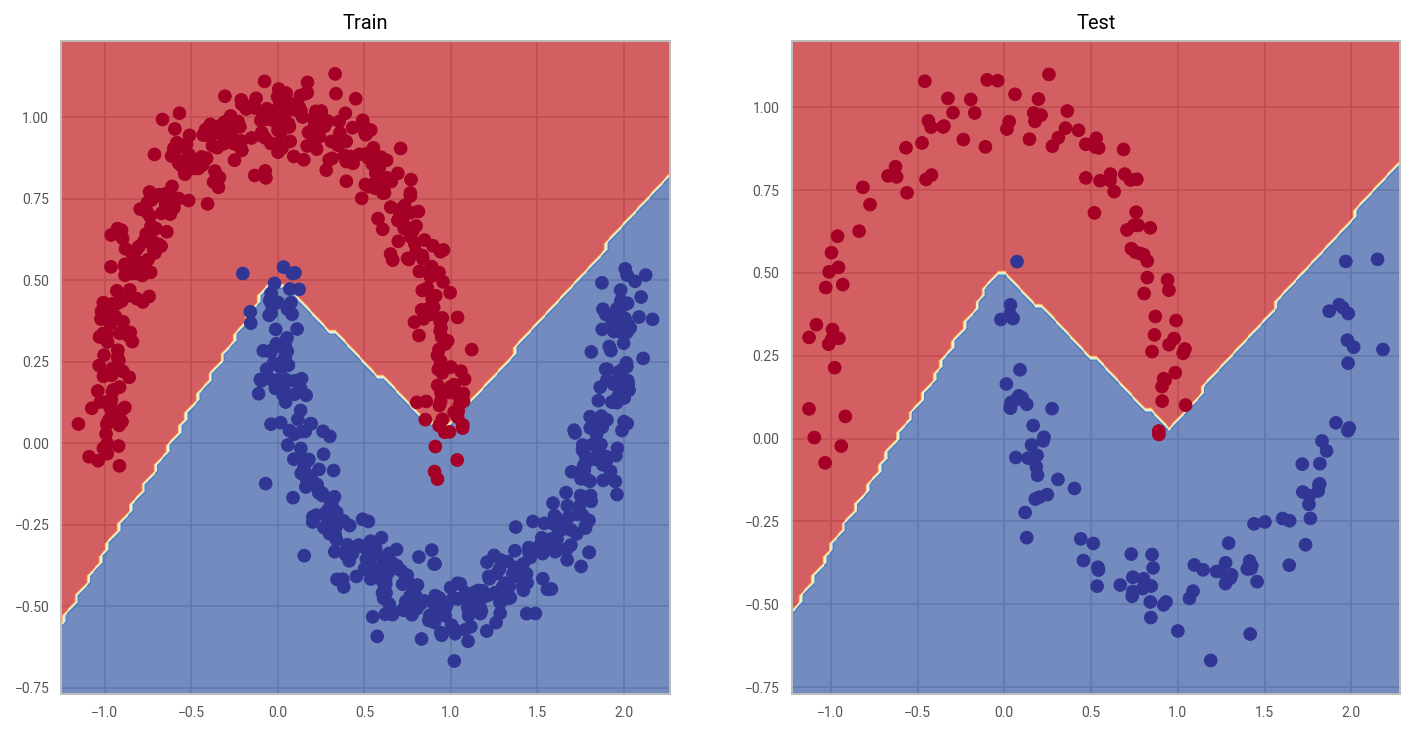

In [20]:

# Plot the model predictions

import numpy as np

# TK - this could go in the helper_functions.py and be explained there
def plot_decision_boundary(model, X, y):
  
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Source - https://madewithml.com/courses/foundations/neural-networks/ 
    # (with modifications)
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), 
                         np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.no_grad():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # mutli-class
    else: 
        y_pred = torch.round(torch.sigmoid(y_logits)) # binary
    
    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(bin_model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(bin_model, x_test, y_test)

In [21]:
print(bin_model.state_dict())

OrderedDict([('layer_1.weight', tensor([[-0.2377,  0.7578],
        [-0.1350,  0.3975],
        [ 1.8047,  0.1734],
        [-0.0906,  0.6486],
        [ 0.1891, -0.1774],
        [ 1.1635,  0.0997],
        [-0.8171,  0.2306],
        [ 0.5799, -0.5416],
        [ 0.5774, -0.6340],
        [-0.4572,  0.7434]])), ('layer_1.bias', tensor([ 0.6191, -0.4376, -0.0243,  0.3387, -0.3950, -1.1121, -0.1181,  0.9875,
         0.9424,  0.9344])), ('layer_2.weight', tensor([[ 0.3400,  0.3091,  0.3127,  0.2779,  0.2643, -0.0794,  0.2609, -0.1051,
          0.0020,  0.2242],
        [ 0.3006,  0.1668,  0.4884, -0.1072,  0.2523, -0.1223,  0.4246, -0.1922,
         -0.1883,  0.4478],
        [ 0.0835, -0.1520,  0.3317,  0.0701, -0.1888, -0.0696, -0.1803, -0.0134,
         -0.2161,  0.2586],
        [-0.0811, -0.1809, -0.2846,  0.2429,  0.0914, -0.2991,  0.2821, -0.0398,
         -0.2831, -0.1039],
        [-0.1650,  0.0653, -0.7894,  0.1557, -0.1356,  1.0058, -0.3413,  0.9279,
          0.7397,  0.04

In [22]:
#make prediction with new trained model
#after 300 epochs lets see how good our model predicts
#create a random seed
import torch

with torch.no_grad():
    y_logits_new = bin_model(x_test)
    
y_logits_new[:5]



tensor([[ 4.4053],
        [-3.9294],
        [ 4.5072],
        [-5.0567],
        [ 4.7635]])

In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [24]:
#y_pred_new is logits, so we convert to prediction labels

y_pred_new = torch.round(torch.sigmoid(y_logits_new)) # binary
y_pred_new[:5]

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]])

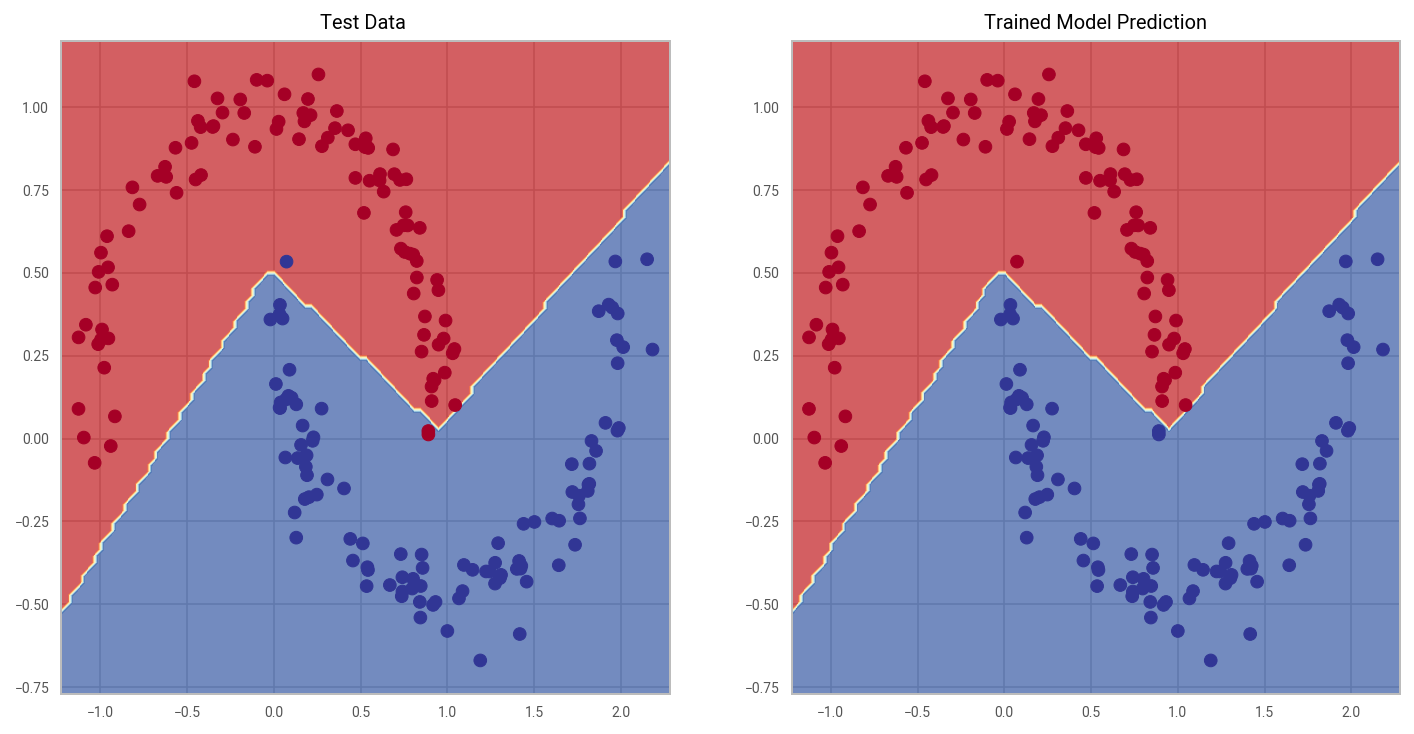

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test Data ")
plot_decision_boundary(bin_model, x_test, y_test)
plt.subplot(1, 2, 2)
plt.title("Trained Model Prediction")
plot_decision_boundary(bin_model, x_test, y_pred_new)

#### Create a multi-class dataset using the spirals data creation function from CS231n .

* Split the data into training and test sets (80% train, 20% test) as well as turn it into PyTorch tensors.
* Construct a model capable of fitting the data (you may need a combination of linear and non-linear layers).
* Build a loss function and optimizer capable of handling multi-class data (optional extension: use the Adam optimizer instead of SGD, you may have to experiment with different values of the learning rate to get it working).
* Make a training and testing loop for the multi-class data and train a model on it to reach over 95% testing accuracy (you can use any accuracy measuring function here that you like).
* Plot the decision boundaries on the spirals dataset from your model predictions, the plot_decision_boundary() function should work for this dataset too.

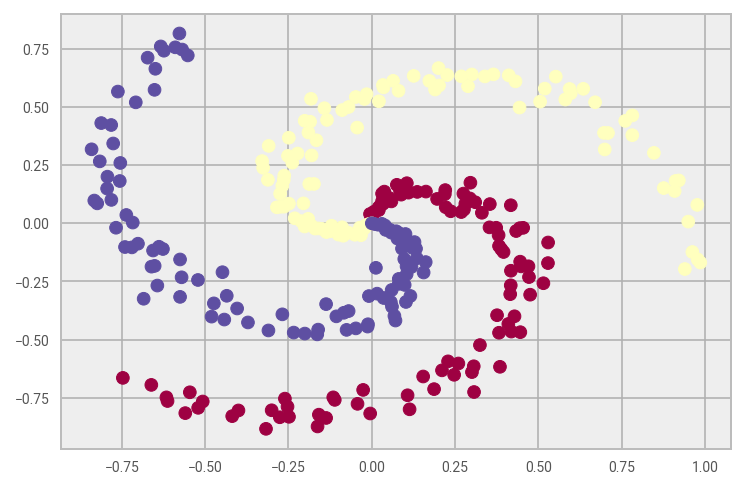

In [26]:
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [27]:
#checking the shape and type of x and y 

print(X[:5], y[:5], type(X), type(y))

[[ 0.          0.        ]
 [-0.00016537  0.01009966]
 [-0.00142885  0.02015143]
 [ 0.00210863  0.03022958]
 [-0.00540239  0.04004124]] [0 0 0 0 0] <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [28]:
#converting the numpy to tensor

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)
print(X[:5], y[:5])

tensor([[ 0.0000,  0.0000],
        [-0.0002,  0.0101],
        [-0.0014,  0.0202],
        [ 0.0021,  0.0302],
        [-0.0054,  0.0400]]) tensor([0, 0, 0, 0, 0])


In [29]:
y.shape

torch.Size([300])

In [30]:
#now we split the data into train and test

from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

len(x_train), len(x_test), len(y_train), len(y_test)

(240, 60, 240, 60)

#### Building a multi-class classification model in PyTorch

In [31]:
from torch import nn

class SpiralModel(nn.Module):
    def __init__(self, in_features, out_features, hidden_units):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = in_features, out_features = hidden_units)
        self.layer_2 = nn.Linear(in_features = hidden_units, out_features = hidden_units)
        self.layer_3 = nn.Linear(in_features = hidden_units, out_features = out_features)
        self.relu = nn.ReLU() #relu is a non linear activation function
        
    def forward(self,x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
multi_model = SpiralModel(in_features=2,
                      out_features=3,
                      hidden_units=10).to(device)
print(multi_model)  

SpiralModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)


In [32]:

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(multi_model.parameters(),
                             lr=0.02)

acc_fn = Accuracy().to(device)
acc_fn

Accuracy()

###### Difference in binary and multiclass classification model

* use sigmoid and round in binary to convert logits to prediction probs to prediction labels. In multi class we use softmax to convert logits to prediction probs and take argmax to convert into prediction labels 
* Binary cross entrophy loss function "BCEWithLogitsLoss" used in binary, cross entrophy loss used in multiclass classification
* Particularly for this data, Adam optimizer works better than SGD


In [33]:
torch.manual_seed(42)

#set number of epochs:
epochs = 1000

epoch_count =[]
loss_values =[]
test_loss_values =[]

# Send data to the device
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

#training loop

for epoch in range(epochs):
    
    1.#training model
    multi_model.train()
    
    2. #forward pass
    
    y_logits = multi_model(x_train).squeeze()
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
    
    
    3. #calculate loss/accuracy
    
    loss = loss_fn(y_logits, y_train)
    #we are using logits are input because the bcewithlogitloss()
                         #that we are using requires raw logits as input
    acc = acc_fn(y_pred, y_train) # the accuracy function needs to compare pred labels (not logits) with actual labels
    
    4. #Optimizer zero grad
    
    optimizer.zero_grad()
    
    5. #loss backward(backward propogation to reduce loss)
    
    loss.backward()
    
    6. #optimizer step(gradient descent)
    
    optimizer.step()
    
    7.#set testing model
    
    multi_model.eval()
    
    with torch.no_grad(): #turns off the gradient tracking
        
        #1.do forward pass
        
        test_logits = multi_model(x_test).squeeze()
        test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
        
        
        #2. calculate the loss
        test_loss = loss_fn(test_logits, y_test)
        
        test_acc = acc_fn(test_pred, y_test)
        
    if epoch%100 == 0:
        
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch} | Loss:{loss:.2f} , Acc: {acc:.2f}% | Test Loss: {test_loss:.2f}, Test acc: {test_acc:.2f}%")
        
        #print out model state dict()
        #print(model_2.state_dict())

Epoch:0 | Loss:1.12 , Acc: 0.32% | Test Loss: 1.10, Test acc: 0.37%
Epoch:100 | Loss:0.45 , Acc: 0.73% | Test Loss: 0.53, Test acc: 0.65%
Epoch:200 | Loss:0.13 , Acc: 0.97% | Test Loss: 0.08, Test acc: 1.00%
Epoch:300 | Loss:0.09 , Acc: 0.98% | Test Loss: 0.05, Test acc: 0.98%
Epoch:400 | Loss:0.07 , Acc: 0.98% | Test Loss: 0.04, Test acc: 0.98%
Epoch:500 | Loss:0.07 , Acc: 0.98% | Test Loss: 0.04, Test acc: 0.98%
Epoch:600 | Loss:0.07 , Acc: 0.98% | Test Loss: 0.04, Test acc: 0.98%
Epoch:700 | Loss:0.06 , Acc: 0.98% | Test Loss: 0.04, Test acc: 0.98%
Epoch:800 | Loss:0.06 , Acc: 0.98% | Test Loss: 0.04, Test acc: 0.98%
Epoch:900 | Loss:0.06 , Acc: 0.98% | Test Loss: 0.04, Test acc: 0.98%


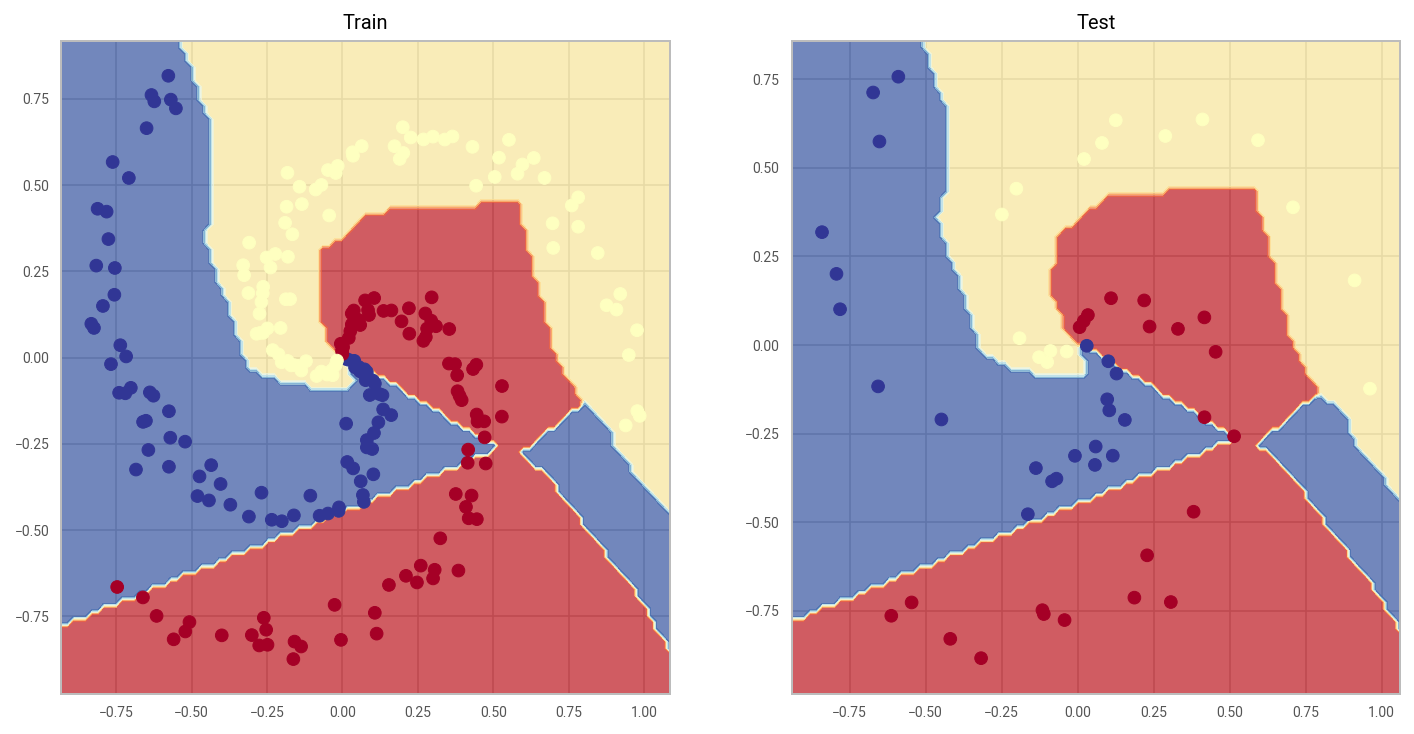

In [34]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(multi_model, x_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(multi_model, x_test, y_test)

In [21]:
print(bin_model.state_dict())

OrderedDict([('layer_1.weight', tensor([[-0.2377,  0.7578],
        [-0.1350,  0.3975],
        [ 1.8047,  0.1734],
        [-0.0906,  0.6486],
        [ 0.1891, -0.1774],
        [ 1.1635,  0.0997],
        [-0.8171,  0.2306],
        [ 0.5799, -0.5416],
        [ 0.5774, -0.6340],
        [-0.4572,  0.7434]])), ('layer_1.bias', tensor([ 0.6191, -0.4376, -0.0243,  0.3387, -0.3950, -1.1121, -0.1181,  0.9875,
         0.9424,  0.9344])), ('layer_2.weight', tensor([[ 0.3400,  0.3091,  0.3127,  0.2779,  0.2643, -0.0794,  0.2609, -0.1051,
          0.0020,  0.2242],
        [ 0.3006,  0.1668,  0.4884, -0.1072,  0.2523, -0.1223,  0.4246, -0.1922,
         -0.1883,  0.4478],
        [ 0.0835, -0.1520,  0.3317,  0.0701, -0.1888, -0.0696, -0.1803, -0.0134,
         -0.2161,  0.2586],
        [-0.0811, -0.1809, -0.2846,  0.2429,  0.0914, -0.2991,  0.2821, -0.0398,
         -0.2831, -0.1039],
        [-0.1650,  0.0653, -0.7894,  0.1557, -0.1356,  1.0058, -0.3413,  0.9279,
          0.7397,  0.04

In [22]:
#make prediction with new trained model
#after 300 epochs lets see how good our model predicts
#create a random seed
import torch

with torch.no_grad():
    y_logits_new = bin_model(x_test)
    
y_logits_new[:5]



tensor([[ 4.4053],
        [-3.9294],
        [ 4.5072],
        [-5.0567],
        [ 4.7635]])

In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [24]:
#y_pred_new is logits, so we convert to prediction labels

y_pred_new = torch.round(torch.sigmoid(y_logits_new)) # binary
y_pred_new[:5]

tensor([[1.],
        [0.],
        [1.],
        [0.],
        [1.]])

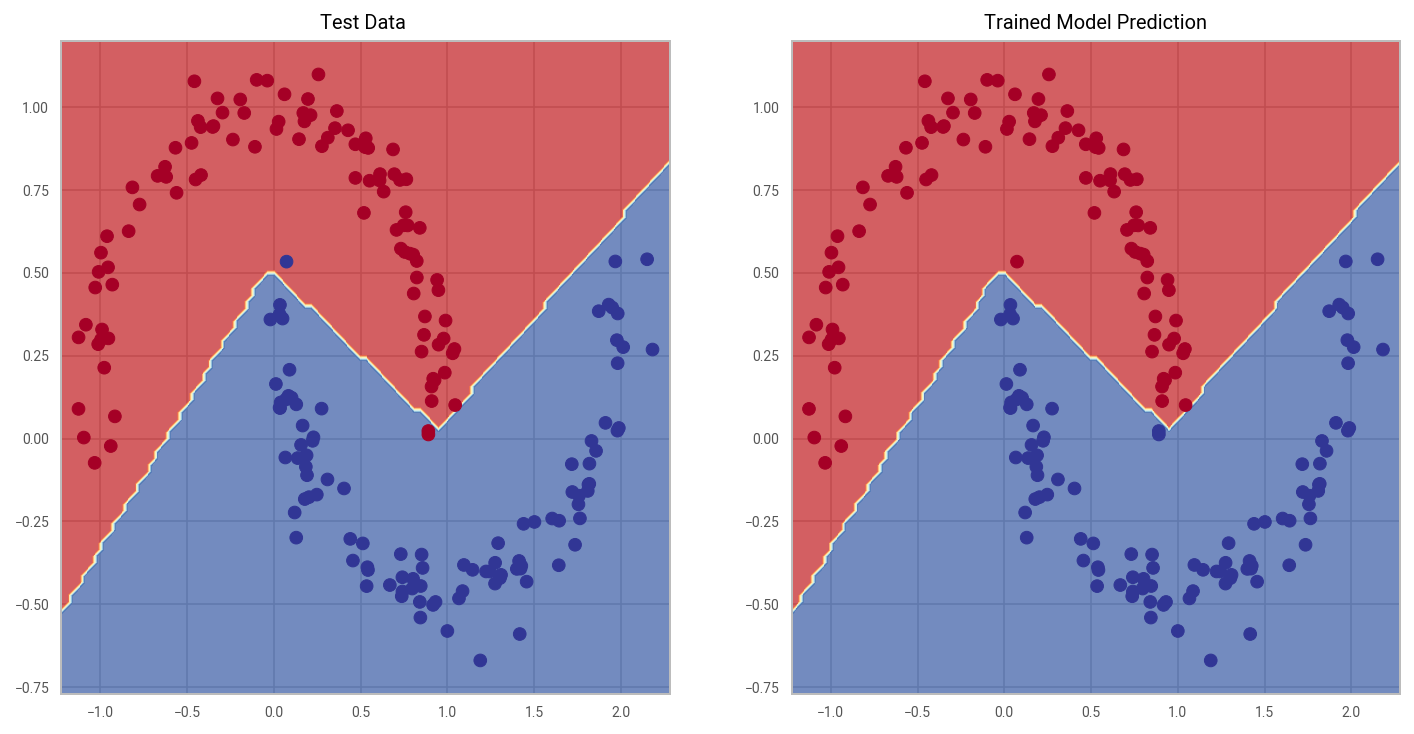

In [25]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Test Data ")
plot_decision_boundary(bin_model, x_test, y_test)
plt.subplot(1, 2, 2)
plt.title("Trained Model Prediction")
plot_decision_boundary(bin_model, x_test, y_pred_new)